In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle


In [31]:
ds=pd.read_csv("./../static/cardio_train.csv", sep=';')
ds.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data = ds.drop(columns = ['id'])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [6]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From data description we can observe that pressure values -ve values which is not logical.

In [7]:
data['age'] = data['age'].map(lambda x: round(x/365))
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Displaying Boxplots for Continous Features

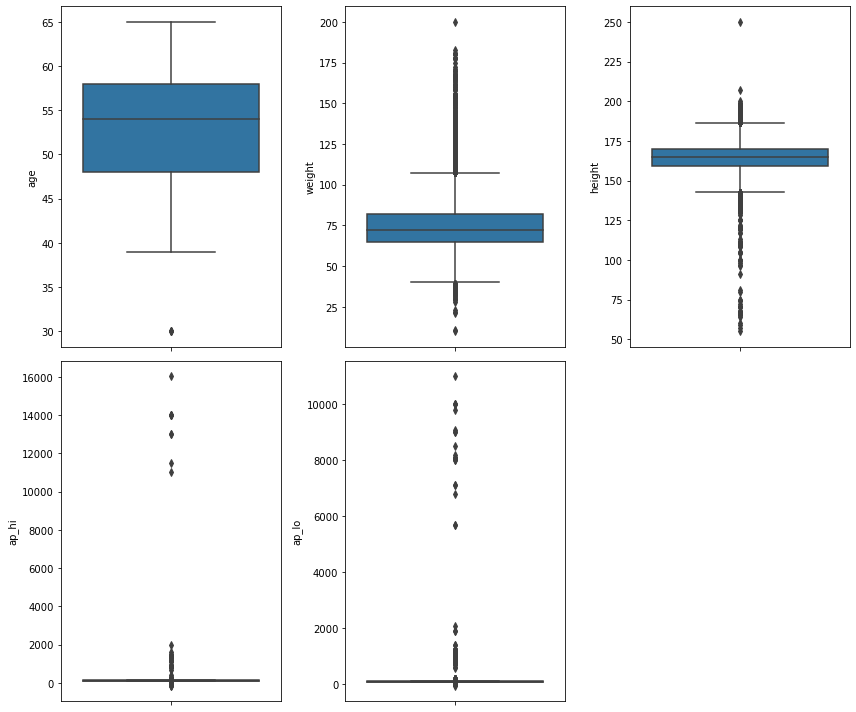

In [8]:
##Data Displaying before handelling

figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.boxplot(y='age', data=data)

plt.subplot(2,3,2)
sns.boxplot( y='weight', data=data)

plt.subplot(2,3,3)
sns.boxplot( y='height', data=data)
plt.subplot(2,3,4)
sns.boxplot( y='ap_hi', data=data)

plt.subplot(2,3,5)
sns.boxplot(y='ap_lo', data=data)

plt.tight_layout()

plt.show()

# Handelling Data Outliers

In [9]:
def outliers_iqr(ys):
    quartile1, quartile3 = np.percentile(ys, [25,75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr*3)
    upper_bound = quartile3 + (iqr*3)
    
    print(f'Q1:{quartile1}, Q3:{quartile3}, IQR:{iqr}')
    print(f'Lower Bound:{lower_bound}, Upper Bound:{upper_bound}')
    
    result = np.where((ys > upper_bound) | (ys < lower_bound))
    boundary = (lower_bound, upper_bound)
    
    print(f'Number of outliers: {len(result[0])}')
    
    return result, boundary

In [10]:
height_outlier_index = list(outliers_iqr(data['height'])[0][0])
data_height_outlier = data.iloc[height_outlier_index,:]

Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 92


In [11]:
weight_outlier_index = list(outliers_iqr(data['weight'])[0][0])
data_weight_outlier = data.iloc[weight_outlier_index,:]


Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 168


In [12]:
ap_hi_outlier_index = list(outliers_iqr(data['ap_hi'])[0][0])
data_ap_hi_outlier = data.iloc[ap_hi_outlier_index,:]

Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 287


In [13]:
ap_lo_outlier_index = list(outliers_iqr(data['ap_lo'])[0][0])
data_ap_lo_outlier = data.iloc[ap_hi_outlier_index,:]


Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1123


In [14]:
def handel_outliers(dataframe, column):
    lower_bound = outliers_iqr(dataframe[column])[1][0]
    upper_bound = outliers_iqr(dataframe[column])[1][1]
    dataframe.loc[(dataframe[column] < lower_bound), column] = lower_bound
    dataframe.loc[(dataframe[column] > upper_bound), column] = upper_bound

In [15]:
handel_outliers(data, 'height')
handel_outliers(data, 'weight')
handel_outliers(data, 'ap_hi')
handel_outliers(data, 'ap_lo')

Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 92
Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 92
Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 168
Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 168
Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 287
Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 287
Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1123
Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1123


#  Data description after handelling outliers

In [16]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.00000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,1.349519,164.391611,74.16499,126.840089,81.850882,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.765427,0.476821,7.975591,14.18814,17.430286,10.464494,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,30.000000,1.000000,126.000000,14.00000,60.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.00000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,203.000000,133.00000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Visulaizing distrubtions of features

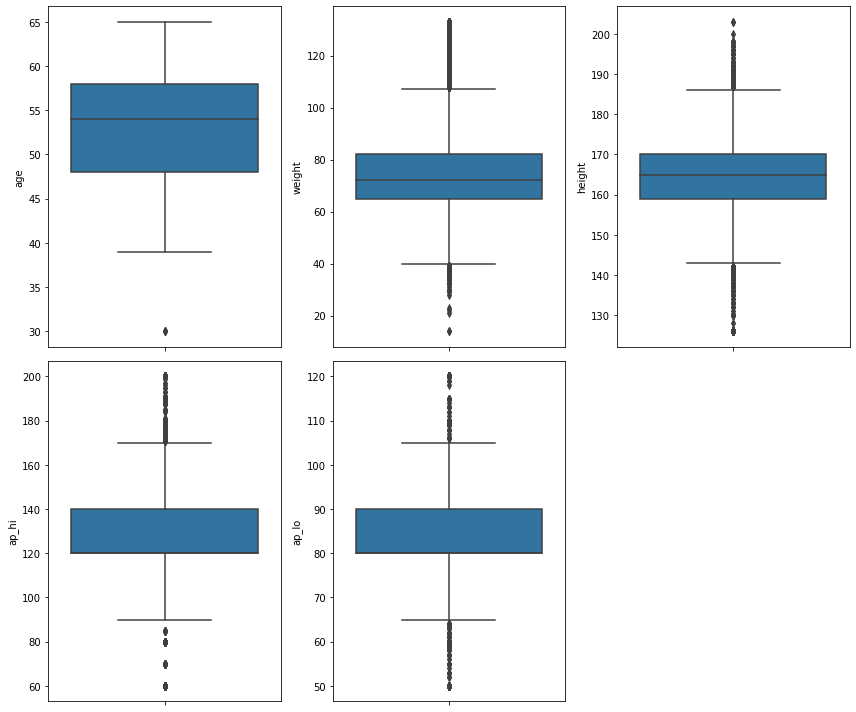

In [17]:
#Data Displaying after handelling

figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.boxplot(y='age', data=data)

plt.subplot(2,3,2)
sns.boxplot( y='weight', data=data)

plt.subplot(2,3,3)
sns.boxplot( y='height', data=data)
plt.subplot(2,3,4)
sns.boxplot( y='ap_hi', data=data)

plt.subplot(2,3,5)
sns.boxplot(y='ap_lo', data=data)

plt.tight_layout()

plt.show()

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


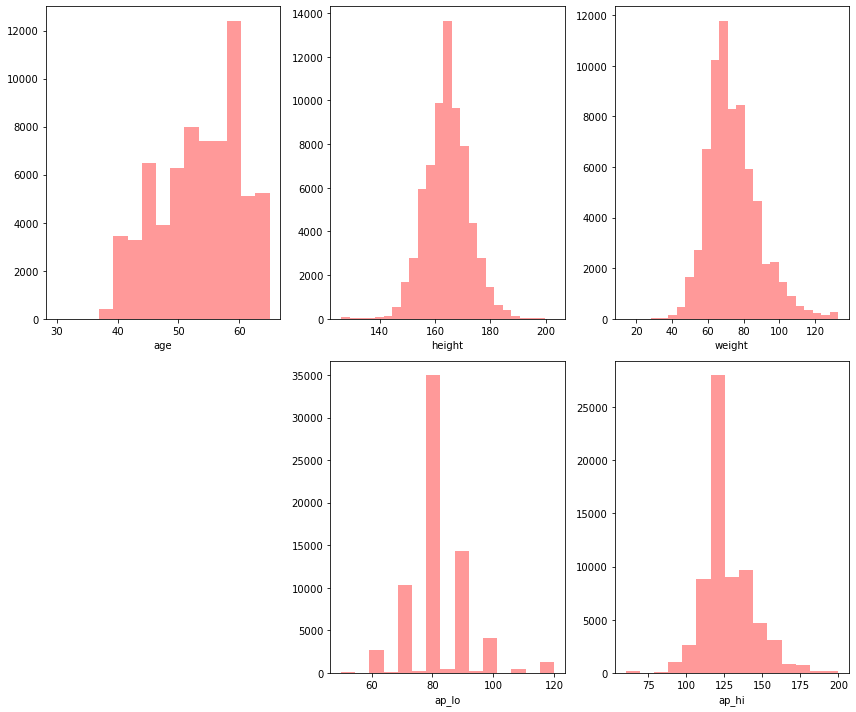

In [18]:
#Feature distrubtion
figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.distplot(data['age'], bins=15, kde=False, color="red")

plt.subplot(2,3,2)
sns.distplot(data['height'], bins=25, kde=False, color="red")

plt.subplot(2,3,3)
sns.distplot(data['weight'], bins=25, kde=False, color="red")

plt.subplot(2,3,5)
sns.distplot(data['ap_lo'], bins=15, kde=False, color="red")

plt.subplot(2,3,6)
sns.distplot(data['ap_hi'], bins=15, kde=False, color="red")

plt.tight_layout()

plt.show()

# Dependancy of each feature for the result

In [19]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

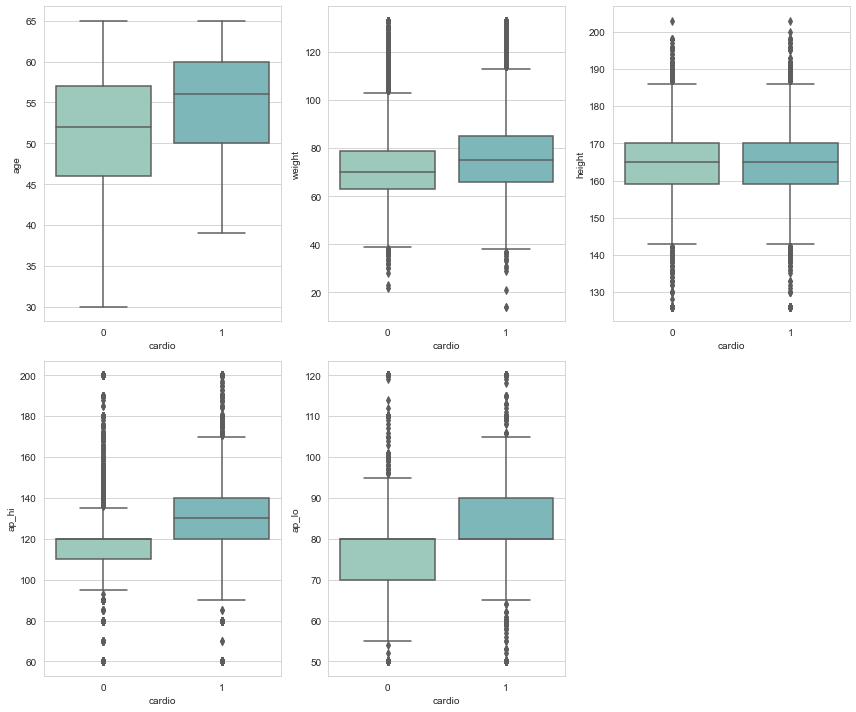

In [20]:
figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.boxplot(x="cardio",y='age', data=data)

plt.subplot(2,3,2)
sns.boxplot(x="cardio", y='weight', data=data)

plt.subplot(2,3,3)
sns.boxplot( x="cardio",y='height', data=data)
plt.subplot(2,3,4)
sns.boxplot( x="cardio",y='ap_hi', data=data)

plt.subplot(2,3,5)
sns.boxplot(x="cardio",y='ap_lo', data=data)

plt.tight_layout()

plt.show()

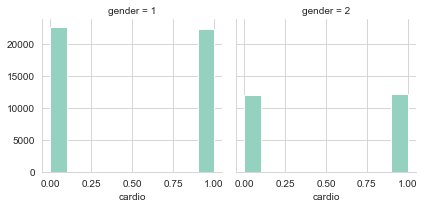

In [21]:
g = sns.FacetGrid(data=data,col='gender')
g.map(plt.hist,'cardio')

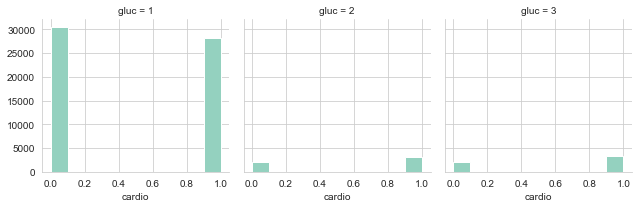

In [22]:
g = sns.FacetGrid(data=data,col='gluc')
g.map(plt.hist,'cardio')

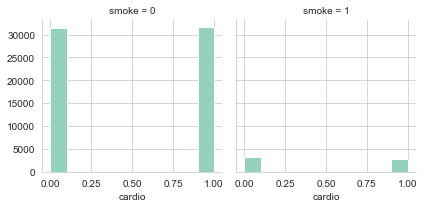

In [23]:
g = sns.FacetGrid(data=data,col='smoke')
g.map(plt.hist,'cardio')

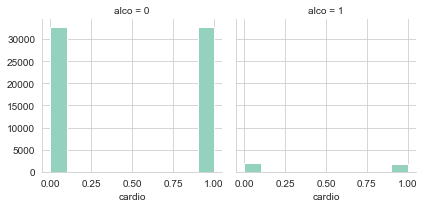

In [24]:
g = sns.FacetGrid(data=data,col='alco')
g.map(plt.hist,'cardio')

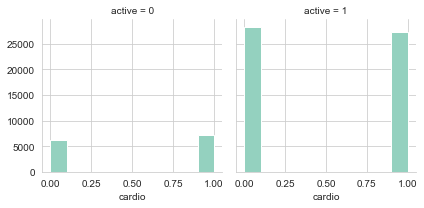

In [25]:
g = sns.FacetGrid(data=data,col='active')
g.map(plt.hist,'cardio')

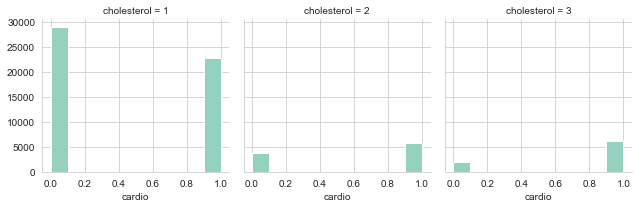

In [26]:
g = sns.FacetGrid(data=data,col='cholesterol')
g.map(plt.hist,'cardio')

# Correlations of different features

In [27]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023360,-0.084454,0.055819,0.201653,0.147323,0.154297,0.098985,-0.047936,-0.029660,-0.009801,0.237709
gender,-0.023360,1.000000,0.513610,0.157233,0.060152,0.067062,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.084454,0.513610,1.000000,0.304102,0.015151,0.032035,-0.053322,-0.020335,0.193188,0.096598,-0.007075,-0.011855
weight,0.055819,0.157233,0.304102,1.000000,0.267074,0.249704,0.143243,0.107990,0.068868,0.067568,-0.017181,0.183429
ap_hi,0.201653,0.060152,0.015151,0.267074,1.000000,0.684838,0.191334,0.090982,0.028066,0.032384,0.003036,0.418812
ap_lo,0.147323,0.067062,0.032035,0.249704,0.684838,1.000000,0.155771,0.073118,0.026881,0.040399,0.003027,0.337503
cholesterol,0.154297,-0.036335,-0.053322,0.143243,0.191334,0.155771,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.098985,-0.021154,-0.020335,0.107990,0.090982,0.073118,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.047936,0.337608,0.193188,0.068868,0.028066,0.026881,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225
alco,-0.029660,0.171015,0.096598,0.067568,0.032384,0.040399,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217


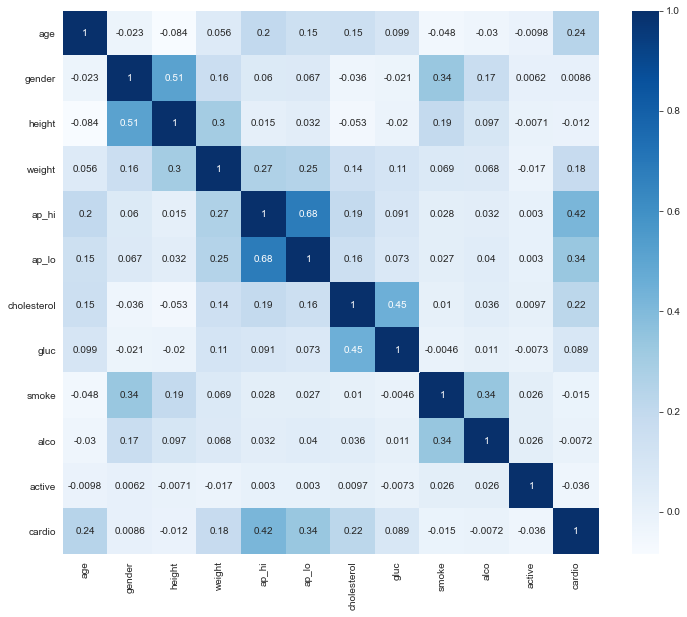

In [28]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
fig = plt.gcf()
fig.set_size_inches(12,10)

In [29]:
data=data.drop(["alco","active","height"],axis=1);
data

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,cardio
0,62,1,69.0,130.0,80.0,2,2,0,0
1,40,1,71.0,110.0,70.0,1,1,0,1
2,60,1,70.0,120.0,80.0,1,1,0,0
3,40,2,85.0,120.0,80.0,1,1,1,0
4,64,1,62.0,120.0,80.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
69296,53,2,76.0,120.0,80.0,1,1,1,0
69297,62,1,126.0,140.0,90.0,2,2,0,1
69298,52,2,105.0,180.0,90.0,3,1,0,1
69299,61,1,72.0,135.0,80.0,1,2,0,1


In [30]:
data.describe()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,cardio
count,69301.000000,69301.000000,69301.00000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,1.349519,74.16499,126.840089,81.850882,1.366806,1.226447,0.088051,0.499589
std,6.765427,0.476821,14.18814,17.430286,10.464494,0.680270,0.572246,0.283371,0.500003
min,30.000000,1.000000,14.00000,60.000000,50.000000,1.000000,1.000000,0.000000,0.000000
25%,48.000000,1.000000,65.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000
50%,54.000000,1.000000,72.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000
75%,58.000000,2.000000,82.00000,140.000000,90.000000,2.000000,1.000000,0.000000,1.000000
max,65.000000,2.000000,133.00000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000


# Model Building with prediction results

In [36]:
x=data.drop('cardio',axis=1)
y=data.cardio
x_test, x_train, y_test, y_train= train_test_split(x,y,test_size = .33,random_state=42)

In [66]:
model = LogisticRegression(max_iter=1000)

In [62]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
model.score(x_train,y_train)

0.7258417140358548

In [40]:
y_pred = model.predict(x_test)

# Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

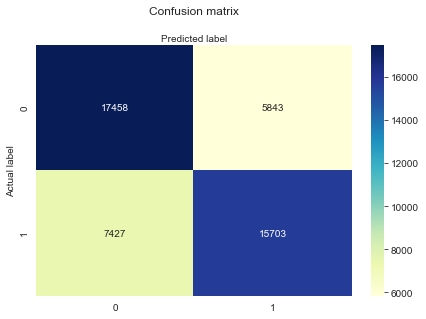

In [50]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Model Statistics

In [65]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7270142792530853
Precision: 0.752085644017939
Recall: 0.674275832252486


In [60]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict_proba(x_test))
print("Log Loss:", logloss)


Log Loss: 0.5643602275730932


# Model Saving

In [67]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))
